In [4]:
import numpy as np
import pandas as pd
import re
from Functions import *

In [5]:
filename_D_iso = "./results/Dispersion_isolated_WG.csv"
filename_D_coupled = "./results/Dispersion_coupled_WG.csv"

In [6]:
df_iso = pd.read_csv(filename_D_iso)

In [7]:
gap_range = (2.5,3.5)

In [8]:
fold_num = 10
gap_arr = []
data_arr = []
AD_range_list = []

df_coupled = pd.read_csv(filename_D_coupled)
# df_coupled = pd.read_csv(filename_D_iso)
# wavl_arr = np.linspace(1500,1600,100)[2:-2]
wavl_arr        = df_coupled["wavl"]
num_of_wavl_pts = len(wavl_arr)
wavl_ticks      = np.arange(0,num_of_wavl_pts,int(num_of_wavl_pts/fold_num))
wavl_labels     = ["{:.3f}".format(wavl_arr[idx]) for idx in wavl_ticks]

pattern = r'^(\w+)\(\s*(-?\d+\.?\d*)\s*,\s*(-?\d+\.?\d*)\s*\)$'
for column in df_coupled.columns[1:]:
    match = re.match(pattern, column)
    if match:
        label = match.group(1)
        gapx = float(match.group(2))  # 转换为整数
        gapy = float(match.group(3))
    else:
        print("No match for " + label)
        continue
    gap = np.sqrt(gapx**2 + gapy**2)
    if gap < min(gap_range) or gap > max(gap_range):
        continue
    gap_arr.append(gap)
    data_arr.append(df_coupled[column])

data_arr = np.array(data_arr)

In [9]:
data_arr_zero_loc_list = []
for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]
    min_zero_idx = len(line)
    max_zero_idx = 0
    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            if j<=min_zero_idx:
                min_zero_idx = j
            if j>=max_zero_idx:
                max_zero_idx = j
            data_arr_zero_loc_list.append([j,i])
    AD_range_list.append([gap_arr[i], max_zero_idx-min_zero_idx,])
AD_range_list = np.array(AD_range_list)

# data_arr_neg_mask = np.where(data_arr<0)
# data_arr[data_arr_neg_mask] = -np.log10(-data_arr[data_arr_neg_mask])
# data_arr_neg_mask = np.where(data_arr>0)
# data_arr[data_arr_neg_mask] = np.log10(data_arr[data_arr_neg_mask])
np.shape(data_arr)
data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)

In [10]:
AD_range_list

array([[  2.5, 166. ],
       [  2.6, 191. ],
       [  2.7, 201. ],
       [  2.8, 202. ],
       [  2.9, 200. ],
       [  3. , 196. ],
       [  3.1, 190. ],
       [  3.2, 183. ],
       [  3.3, 176. ],
       [  3.4, 167. ],
       [  3.5, 150. ]])

In [11]:
np.argmax(AD_range_list[:,1])

np.int64(3)

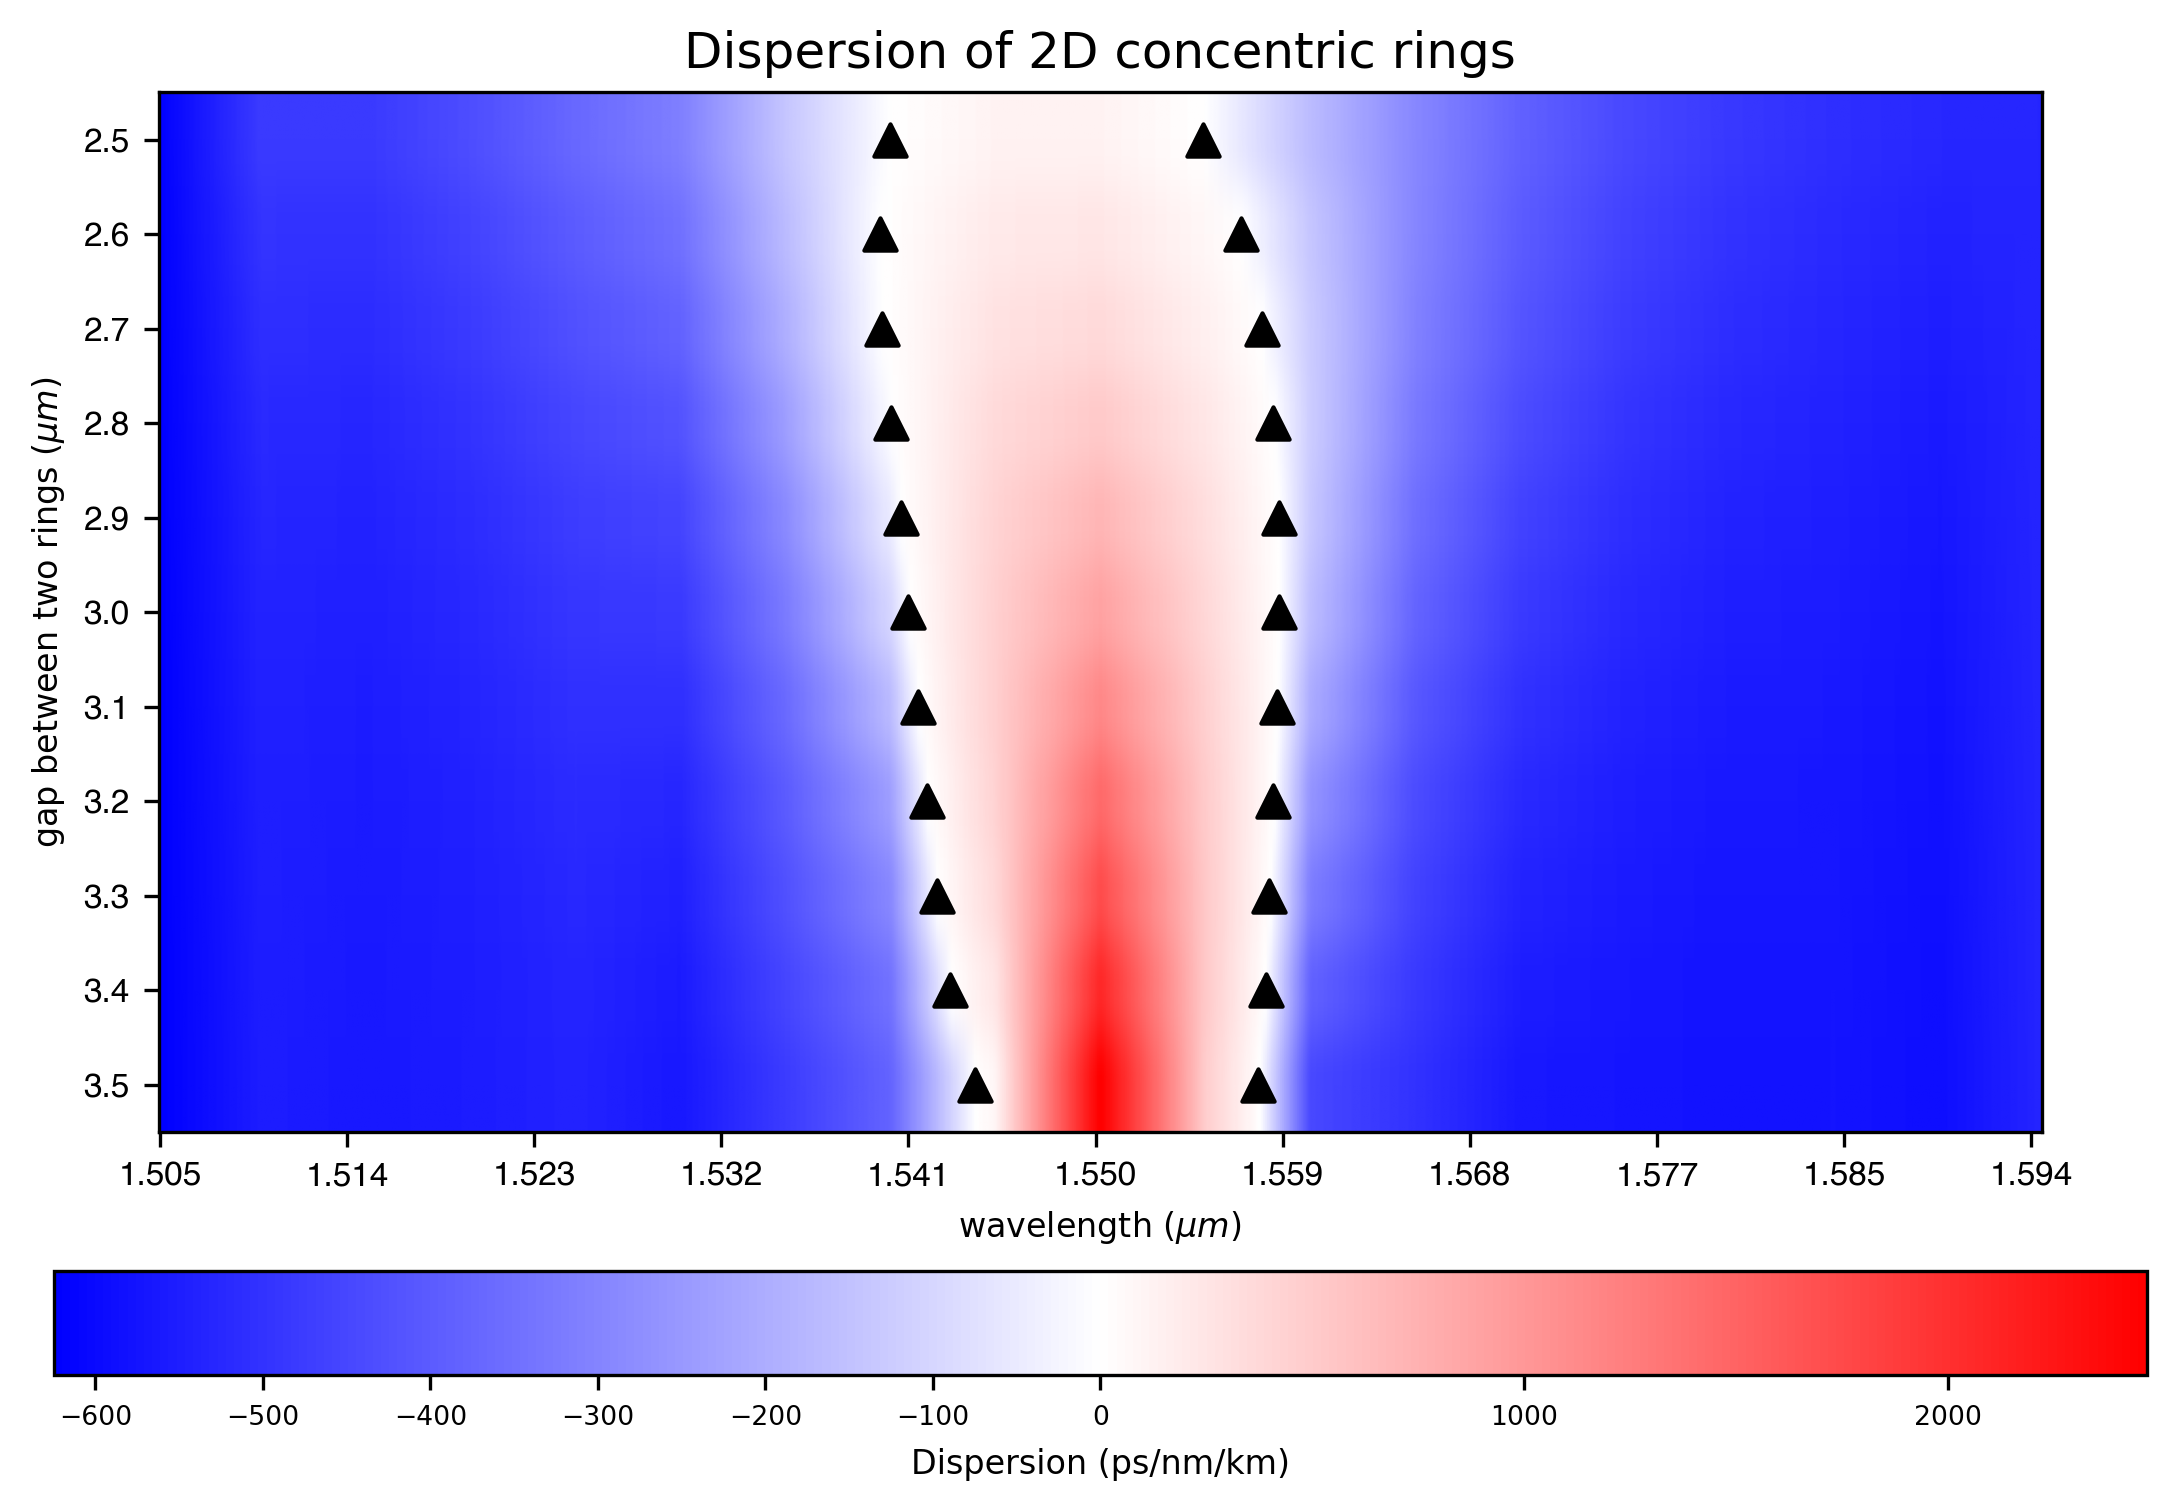

In [12]:
param_dict = {
        "figsize"       : [8,8],
        "point_color"   : 'black',
        "point_size"    : 60,
        # "point_marker"  : ".",
        "point_marker"  : "^",
        "norm"          : 'zero_divided',
        "colormap"      : "bwr",
        "aspect"        : 50,
        "xlabel"        : r"wavelength ($\mu m$)",
        "ylabel"        : r"gap between two rings ($\mu m$)",
        "cbar_label"    : r"Dispersion (ps/nm/km)",
        "cbar_small_ticks" : False,
        "figsize"       : (10,6),
        "title"         : "Dispersion of 2D concentric rings",
        "xticks"        : wavl_ticks,
        "yticks"        : np.arange(0,len(gap_arr),1),
        "xtickslabel"   : wavl_labels,
        "ytickslabel"   : gap_arr,
        "fontsize"      : 8,
        "foldername"    : "./results/"
}
Plot_im(data_arr, point_arr = data_arr_zero_loc_list, **param_dict)

In [13]:
1505 + (1595-1505)/1000*382

1539.38

In [14]:
1505 + (1595-1505)/1000*583

1557.47